In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/pool2_hNIL")

In [0]:
# required for umap clustering
! pip3 install leidenalg 
! pip3 install scanpy
# ! pip install python-igraph
# ! pip install louvain
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt


In [0]:
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.18.2 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.0


In [0]:
%%bash
unzip vireo/pool2_hNIL_results.zip

In [0]:
## run the clustering using py
%%bash
python scanpy_pool2_hNIL.py

In [0]:
# load the scanpy object which has been analyzed before
adata = sc.read("scanpy_out/pool2_hNIL.h5ad")

In [0]:
adata

AnnData object with n_obs × n_vars = 7836 × 2152 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

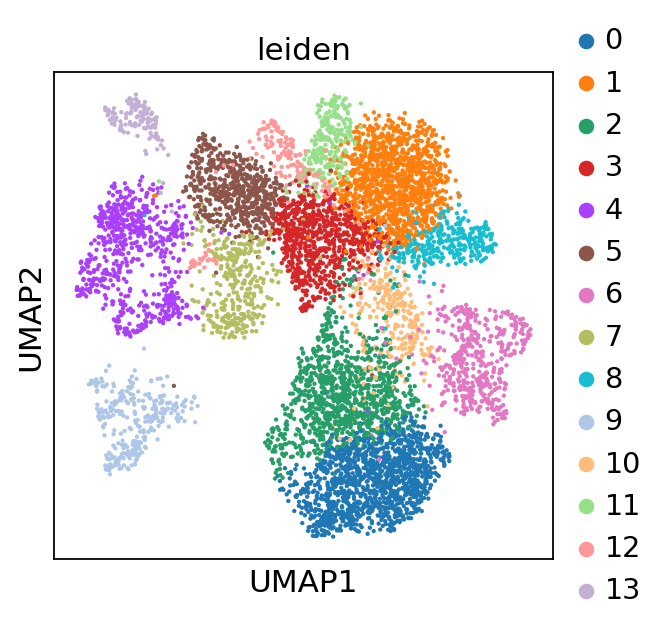

In [0]:
sc.pl.umap(adata, color=['leiden'])

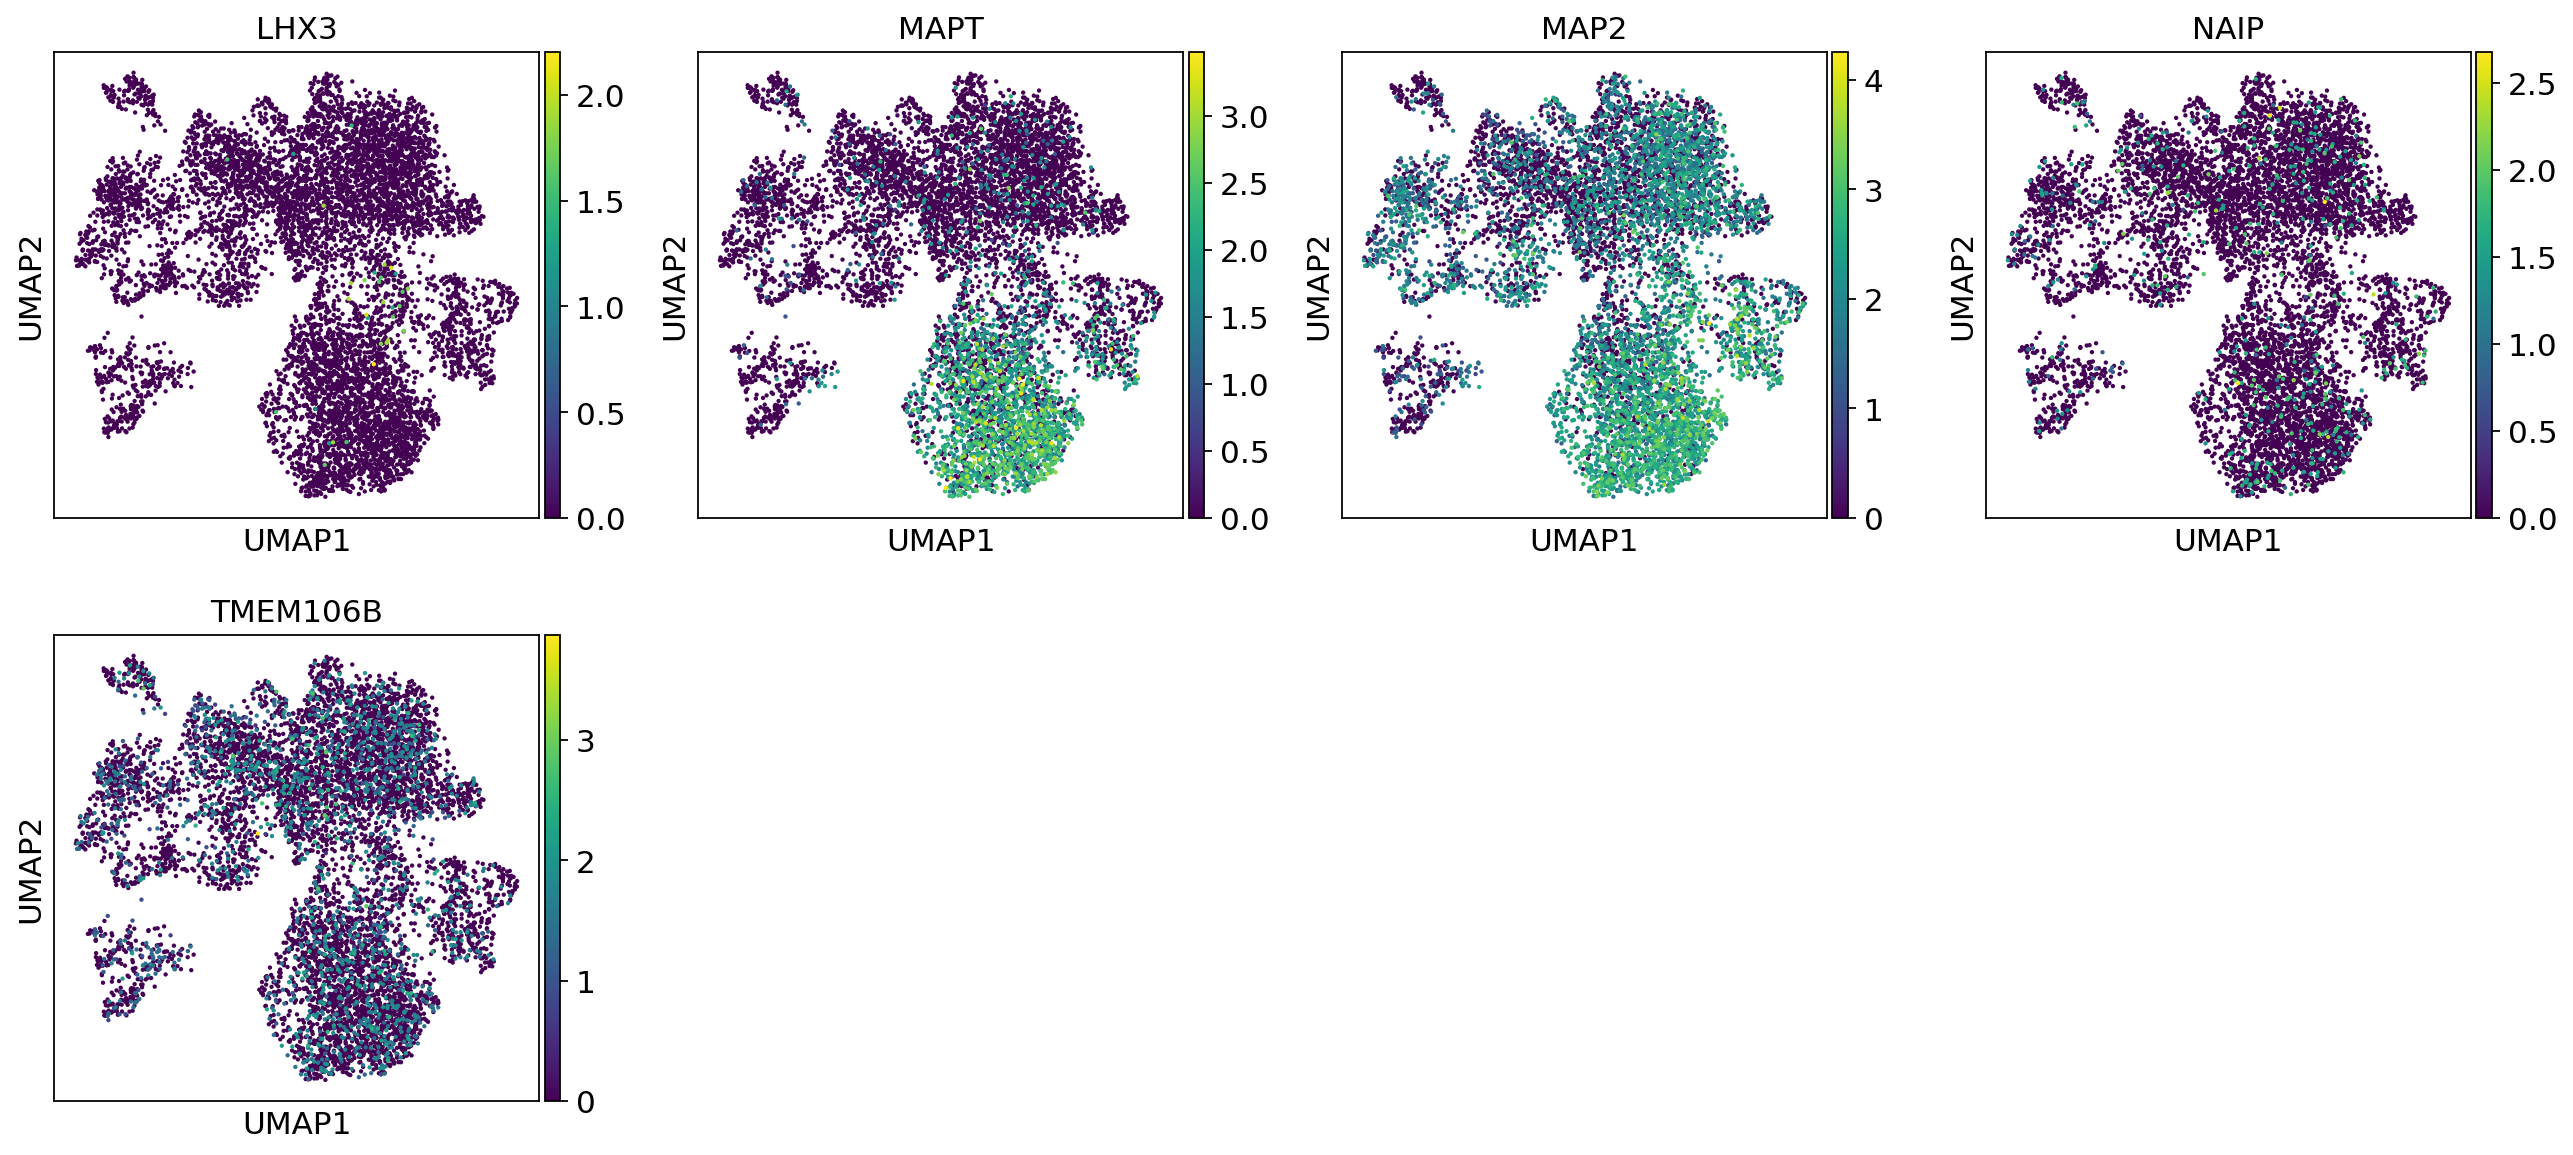

In [0]:
sc.pl.umap(adata, color=['LHX3','MAPT','MAP2', 'NAIP', 'TMEM106B'])

# Add my donor information from vireo_out

Note that there are unassigned cells due to the assigning ambugrity between GT19-38452 or  GT19-38451.

Next time, remove the sample of GT19-38452 from donor_vcf files before runing vireo

For the present, manually assign GT19-38452/1 back to cell barcodes

In [0]:
# input my donor information from vireo_out
%ls vireo/vireo_out/

donor_ids.tsv                  _log.txt             prob_singlet.tsv.gz
fig_GT_distance_estimated.pdf  prob_doublet.tsv.gz  summary.tsv


In [0]:
!cat vireo/vireo_out/summary.tsv

Var1	Freq
GT19-38445	1769
GT19-38446	636
GT19-38447	2294
GT19-38448	531
GT19-38449	186
GT19-38450	177
GT19-38451	1667
doublet	750
unassigned	27


In [0]:
donors= pd.read_csv("vireo/vireo_out/donor_ids.tsv", '\t', index_col="cell")
donors.head(4)

donor_id  prob_max  ...  best_singlet           best_doublet
cell                                      ...                                     
AAACCCAAGGCTTCCG-1  GT19-38447       1.0  ...    GT19-38447  GT19-38446,GT19-38445
AAACCCACAAGCCTGC-1  GT19-38446       1.0  ...    GT19-38446  GT19-38446,GT19-38450
AAACCCACAGTCCGTG-1  GT19-38447       1.0  ...    GT19-38447  GT19-38446,GT19-38451
AAACCCAGTGCGGATA-1  GT19-38449       1.0  ...    GT19-38449  GT19-38448,GT19-38445

[4 rows x 6 columns]

Assign missing donor_id to cell barcodes

In [0]:
donors_subset = donors[["donor_id"]]
donors_subset["donor_label"]=donors["donor_id"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# only get the column of interest and add one more for match to meatadata
donors_subset.head()

donor_id donor_label
cell                                      
AAACCCAAGGCTTCCG-1  GT19-38447  GT19-38447
AAACCCACAAGCCTGC-1  GT19-38446  GT19-38446
AAACCCACAGTCCGTG-1  GT19-38447  GT19-38447
AAACCCAGTGCGGATA-1  GT19-38449  GT19-38449
AAACCCAGTGGACAGT-1  GT19-38445  GT19-38445

# get the metadata of the donors

In [0]:
%ls ../test_vireo/modify_donor/

'Copy of 19-Cel-005 Metadata.xlsx'   test_donor_to_use.vcf.gz
 meta_7Labels.csv                    test_donor.vcf
 meta_wgs_Psomagen.7Labels.csv       test_donor.vcf.gz
 meta_wgs_Psomagen.csv               test_donor.vcf.gz.tbi
 sedfnjT29                           test_today/
 sub_UNHS_changed.vcf.gz             UNHS_to_use_7s.vcf.gz
 sub_UNHS_changed.vcf.gz.tbi         UNHS_to_use.vcf.gz
 sub_UNHS_filter.vcf.gz              UNHS.vcf.gz
 sub_UNHS.vcf.gz                     UNHS.vcf.gz.csi
 sub_UNHS.vcf.gz.csi                 UNHS.vcf.gz.tbi
 test_cell.vcf.gz


In [0]:
# retrieve the 8 donor's original labels from metadata
meta = pd.read_csv("../test_vireo/modify_donor/meta_wgs_Psomagen.7Labels.csv")

In [0]:
meta

sample_id                   donor_label
0  GT19-38445               KOLF2-ARID2-A02
1  GT19-38446                      KUCG3-C1
2  GT19-38447                      NCRM1-C6
3  GT19-38448                      NCRM5-C5
4  GT19-38449                       PGP1-C2
5  GT19-38450                     LNGPI1-C1
6  GT19-38451  NN0003932-C3 or NN0004297-C1

# match donor_id to donor_label

In [0]:
# # match donor_id to donor_label
vals_to_replace = {'GT19-38445':'KOLF2-ARID2-A02', 
                   'GT19-38446':'KUCG3-C1', 
                   'GT19-38447':'NCRM1-C6',
                   'GT19-38448':'NCRM5-C5',
                   'GT19-38449':'PGP1-C2',
                   'GT19-38450':'LNGPI1-C1',
                   'GT19-38451':'NN0003932-C3 or NN0004297-C1'
                   }

donors_subset["donor_label"] = donors_subset["donor_label"].map(vals_to_replace)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [0]:
donors_subset.head()

donor_id      donor_label
cell                                           
AAACCCAAGGCTTCCG-1  GT19-38447         NCRM1-C6
AAACCCACAAGCCTGC-1  GT19-38446         KUCG3-C1
AAACCCACAGTCCGTG-1  GT19-38447         NCRM1-C6
AAACCCAGTGCGGATA-1  GT19-38449          PGP1-C2
AAACCCAGTGGACAGT-1  GT19-38445  KOLF2-ARID2-A02

In [0]:
adata.obs.head()

n_genes  percent_mito  n_counts leiden
AAACCCAAGGCTTCCG-1     1389      0.054854    2534.0      1
AAACCCACAAGCCTGC-1     2125      0.049356    4660.0      4
AAACCCACAGTCCGTG-1     1331      0.083945    2180.0      2
AAACCCAGTGCGGATA-1     1579      0.066014    2348.0      0
AAACCCAGTGGACAGT-1     1779      0.053329    3469.0      1

In [0]:
# note that the row numbers of donor_subset and that of adata are not the same because adata has been filtered for doublets
print("cell numbers in donor_file are:", len(donors_subset))
print("cell numbers in adata are:", len(adata.obs))

cell numbers in donor_file are: 8037
cell numbers in adata are: 7836


# merge donor_label to adata

In [0]:
# merge two dataframes
adata.obs = adata.obs.merge(donors_subset, left_index=True, right_index=True)
adata.obs.head()

n_genes  percent_mito  ...    donor_id      donor_label
AAACCCAAGGCTTCCG-1     1389      0.054854  ...  GT19-38447         NCRM1-C6
AAACCCACAAGCCTGC-1     2125      0.049356  ...  GT19-38446         KUCG3-C1
AAACCCACAGTCCGTG-1     1331      0.083945  ...  GT19-38447         NCRM1-C6
AAACCCAGTGCGGATA-1     1579      0.066014  ...  GT19-38449          PGP1-C2
AAACCCAGTGGACAGT-1     1779      0.053329  ...  GT19-38445  KOLF2-ARID2-A02

[5 rows x 6 columns]

In [0]:
adata.obs.to_csv("scanpy_out/pool2_hNIL_adata_with_donors.csv")

In [0]:
table = adata.obs.groupby(['donor_label'])['leiden'].agg(["count", "nunique", "unique"])

In [0]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [0]:
table

count  nunique                                                                                                       unique
donor_label                                                                                                                                              
KOLF2-ARID2-A02                1719       14     [1, 9, 2, 8, 10, ..., 3, 4, 6, 5, 13]
Length: 14
Categories (14, object): [1, 9, 2, 8, ..., 4, 6, 5, 13]
KUCG3-C1                        629       14   [4, 0, 1, 3, 5, ..., 12, 8, 11, 6, 13]
Length: 14
Categories (14, object): [4, 0, 1, 3, ..., 8, 11, 6, 13]
LNGPI1-C1                       164       11    [6, 2, 5, 7, 3, ..., 0, 8, 12, 13, 1]
Length: 11
Categories (11, object): [6, 2, 5, 7, ..., 8, 12, 13, 1]
NCRM1-C6                       2224       14      [1, 2, 4, 0, 8, ..., 9, 7, 5, 13, 6]
Length: 14
Categories (14, object): [1, 2, 4, 0, ..., 7, 5, 13, 6]
NCRM5-C5                        517       14  [8, 5, 3, 6, 2, ..., 9, 4, 10, 12, 13]
Length: 14
Categories (14, object): [8, 5, 3, 6, ..., 4, 10, 12, 13]
NN0003932-C3 or NN0004297-C1   1633       14  [1, 8, 2, 6, 0, ..., 4, 7, 10, 12, 13]
Length: 14
Categories (14, object): [1, 8, 2, 6, ..., 7, 10, 12, 13]
PGP1-C2                         180        9                          [0, 5, 1, 7, 8, 2, 10, 3, 4]
Categories (9, object): [0, 5, 1, 7, ..., 2, 10, 3, 4]

In [0]:
table.to_csv("scanpy_out/pool1_hNIL_donor_by_leiden.csv")

In [0]:
table2 = adata.obs.groupby(['leiden'])['donor_label'].agg(["count", "nunique", "unique"])

In [0]:
table2

count  nunique                                                                                                  unique
leiden                                                                                                                        
0        1251        7  [PGP1-C2, KUCG3-C1, NCRM1-C6, KOLF2-ARID2-A02, NN0003932-C3 or NN0004297-C1, nan, NCRM5-C5, LNGPI1-C1]
1        1133        7  [NCRM1-C6, KOLF2-ARID2-A02, NN0003932-C3 or NN0004297-C1, KUCG3-C1, nan, PGP1-C2, NCRM5-C5, LNGPI1-C1]
2         863        7  [NCRM1-C6, KOLF2-ARID2-A02, NN0003932-C3 or NN0004297-C1, LNGPI1-C1, NCRM5-C5, nan, KUCG3-C1, PGP1-C2]
3         735        7  [NCRM1-C6, NCRM5-C5, KUCG3-C1, nan, KOLF2-ARID2-A02, NN0003932-C3 or NN0004297-C1, LNGPI1-C1, PGP1-C2]
4         577        7  [KUCG3-C1, NCRM1-C6, nan, KOLF2-ARID2-A02, NN0003932-C3 or NN0004297-C1, LNGPI1-C1, NCRM5-C5, PGP1-C2]
5         530        7  [nan, NCRM5-C5, LNGPI1-C1, KUCG3-C1, PGP1-C2, NN0003932-C3 or NN0004297-C1, NCRM1-C6, KOLF2-ARID2-A02]
6         370        6           [LNGPI1-C1, NN0003932-C3 or NN0004297-C1, NCRM5-C5, KOLF2-ARID2-A02, nan, NCRM1-C6, KUCG3-C1]
7         307        7  [KOLF2-ARID2-A02, KUCG3-C1, NCRM5-C5, LNGPI1-C1, NCRM1-C6, NN0003932-C3 or NN0004297-C1, PGP1-C2, nan]
8         297        7  [NN0003932-C3 or NN0004297-C1, KOLF2-ARID2-A02, NCRM1-C6, NCRM5-C5, PGP1-C2, KUCG3-C1, nan, LNGPI1-C1]
9         242        5                      [KOLF2-ARID2-A02, KUCG3-C1, NN0003932-C3 or NN0004297-C1, nan, NCRM1-C6, NCRM5-C5]
10        251        6             [KOLF2-ARID2-A02, NCRM1-C6, nan, KUCG3-C1, NN0003932-C3 or NN0004297-C1, PGP1-C2, NCRM5-C5]
11        253        5                      [NCRM1-C6, KOLF2-ARID2-A02, NN0003932-C3 or NN0004297-C1, NCRM5-C5, nan, KUCG3-C1]
12        149        6           [NCRM1-C6, KOLF2-ARID2-A02, nan, KUCG3-C1, NN0003932-C3 or NN0004297-C1, NCRM5-C5, LNGPI1-C1]
13        108        6           [NCRM1-C6, KOLF2-ARID2-A02, nan, NN0003932-C3 or NN0004297-C1, NCRM5-C5, KUCG3-C1, LNGPI1-C1]

In [0]:
table2.to_csv("scanpy_out/pool2_hNIL_leiden_by_donor.csv")

In [0]:
adata.write_h5ad("scanpy_out/pool2_hNIL_with_donors.h5ad")

... storing 'donor_id' as categorical
... storing 'donor_label' as categorical


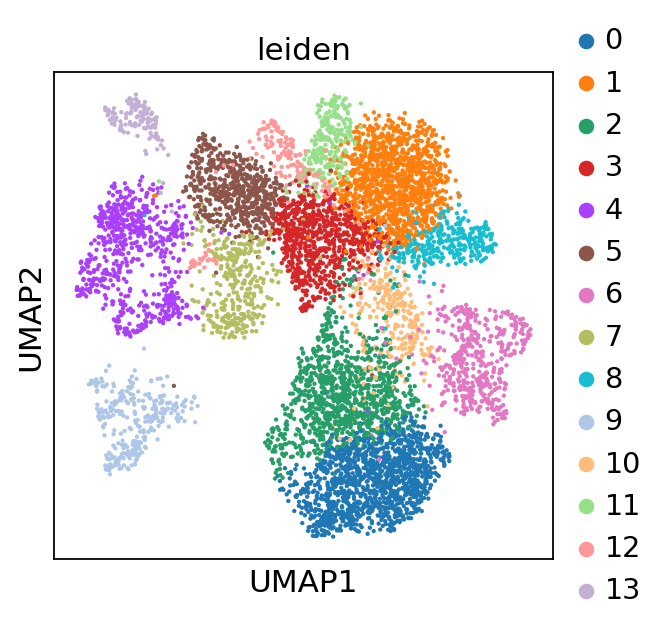

In [0]:
# skip gene "TMEM106B)"
sc.pl.umap(adata, color=['leiden'], save="UMAP_pool2_hNIL_clusters.pdf")

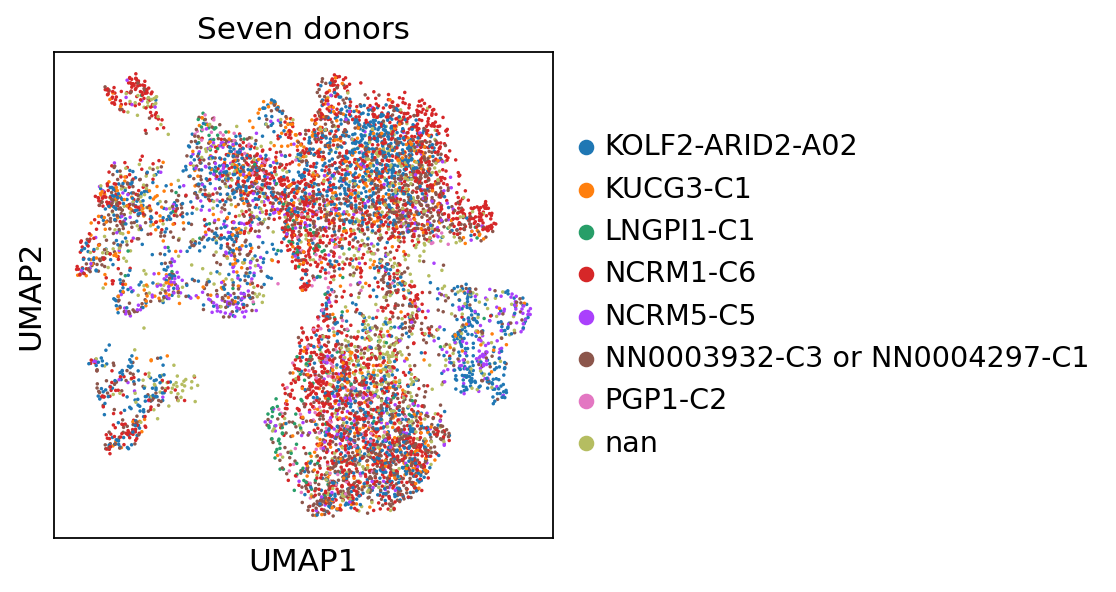

In [0]:
sc.pl.umap(adata, color=['donor_label'], title="Seven donors", size=10, save="UMAP_pool2_hNIL_donors.pdf")

In [0]:
labels = ['KOLF2-ARID2-A02',
 'KUCG3-C1',
 'NCRM1-C6',
 'NCRM5-C5',
 'PGP1-C2',
 'LNGPI1-C1',
 'NN0003932-C3 or NN0004297-C1', 'nan']

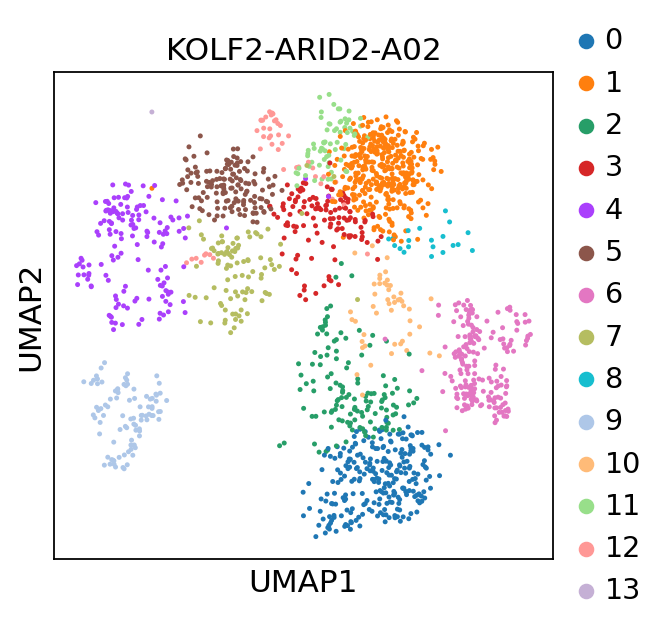

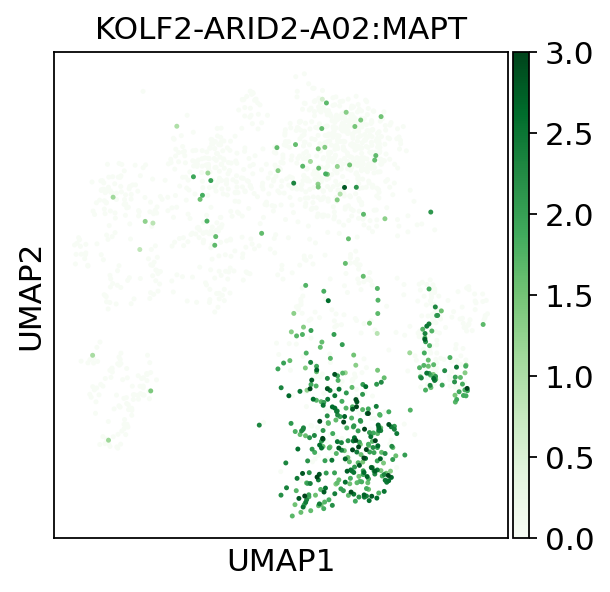

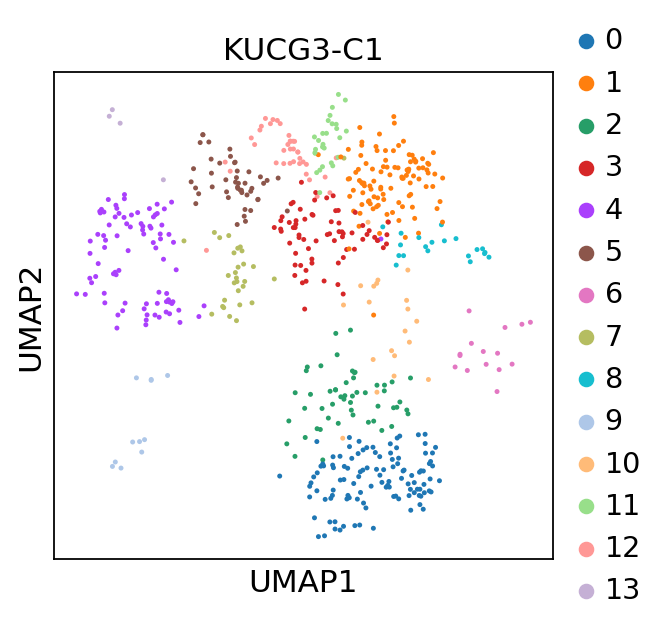

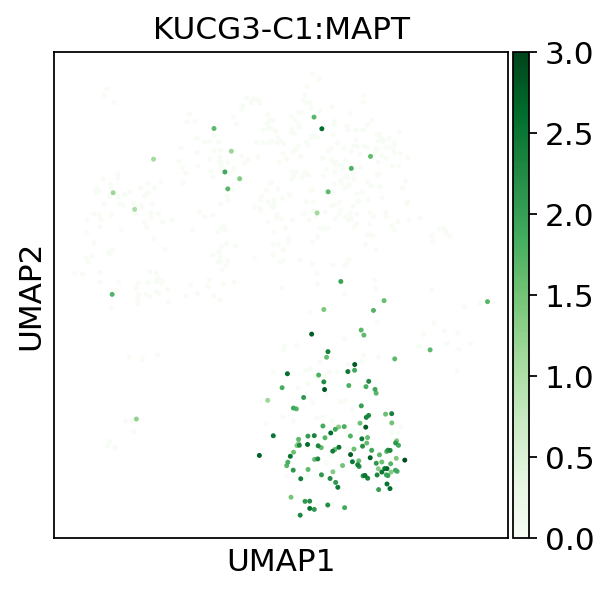

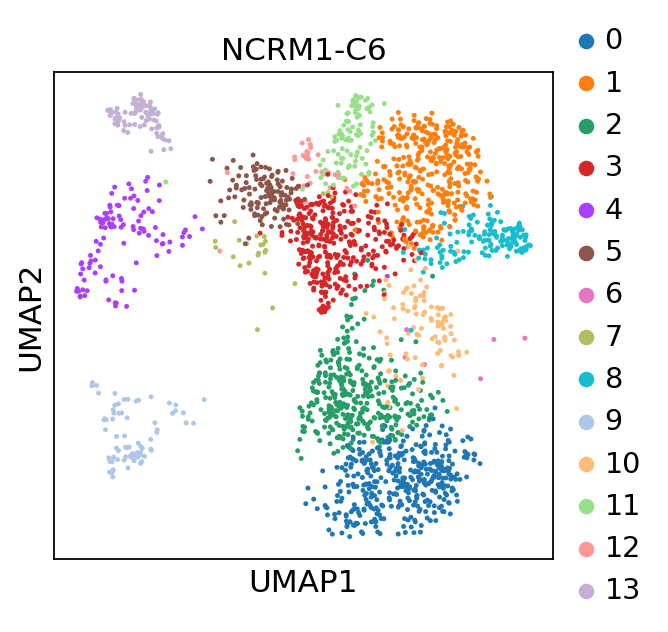

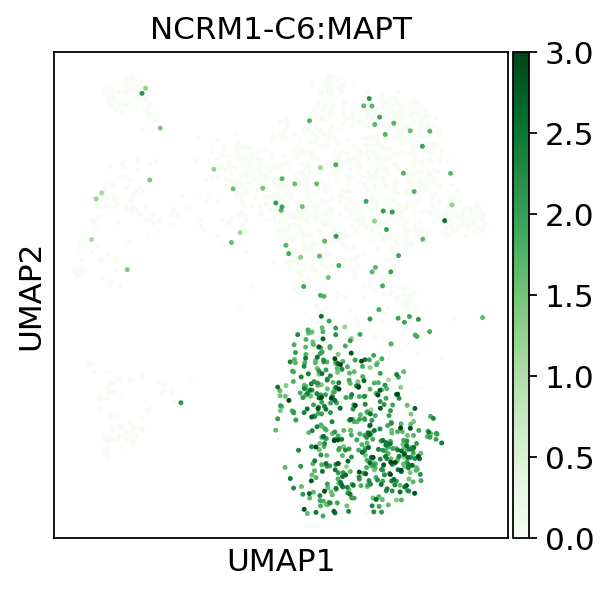

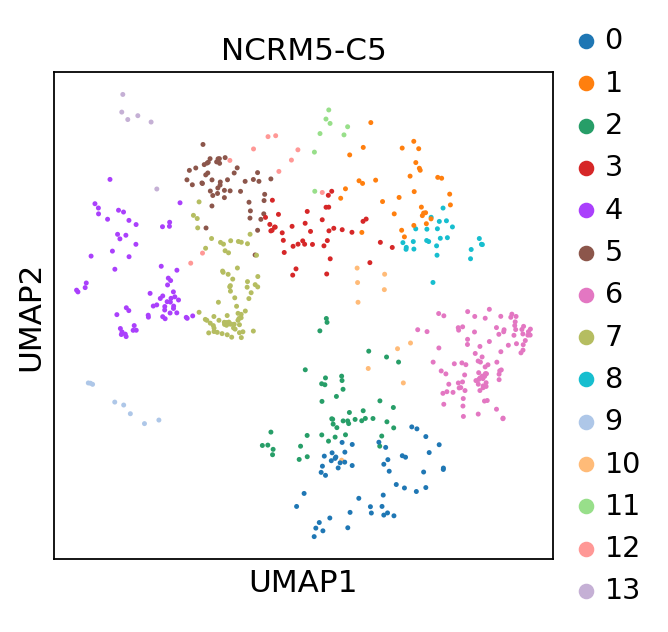

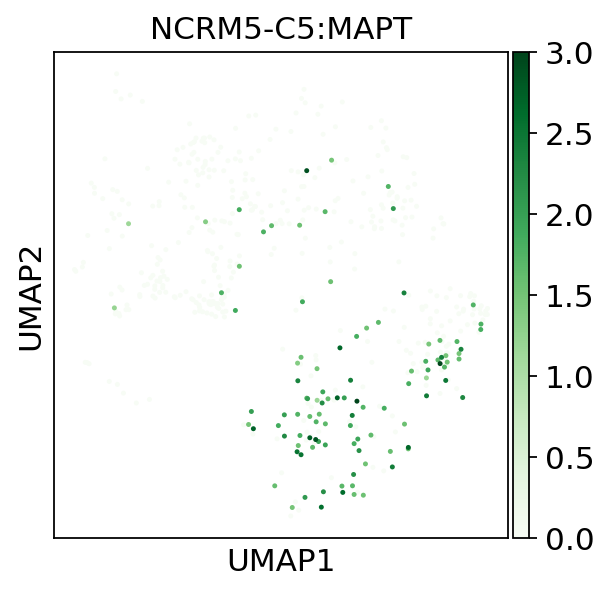

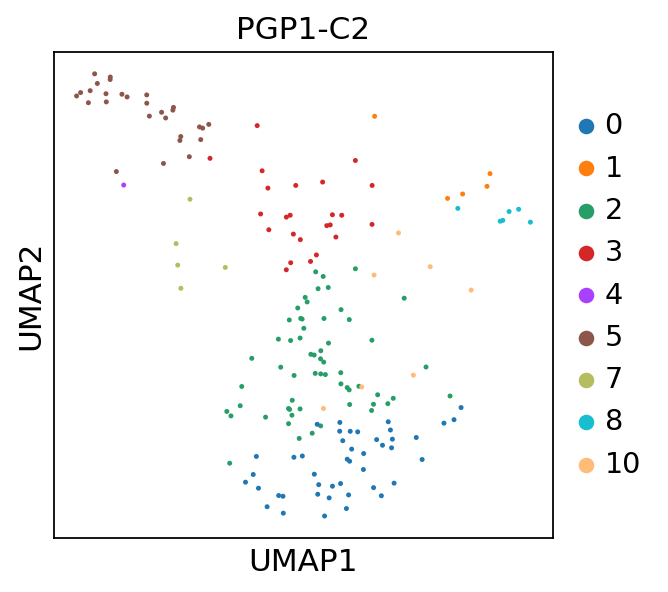

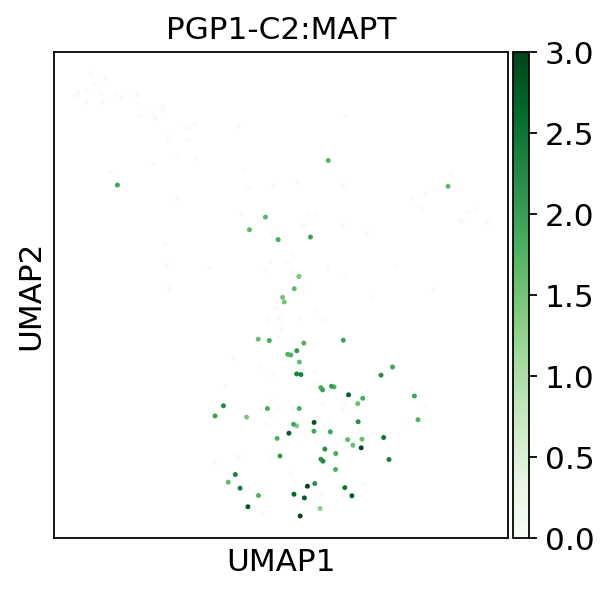

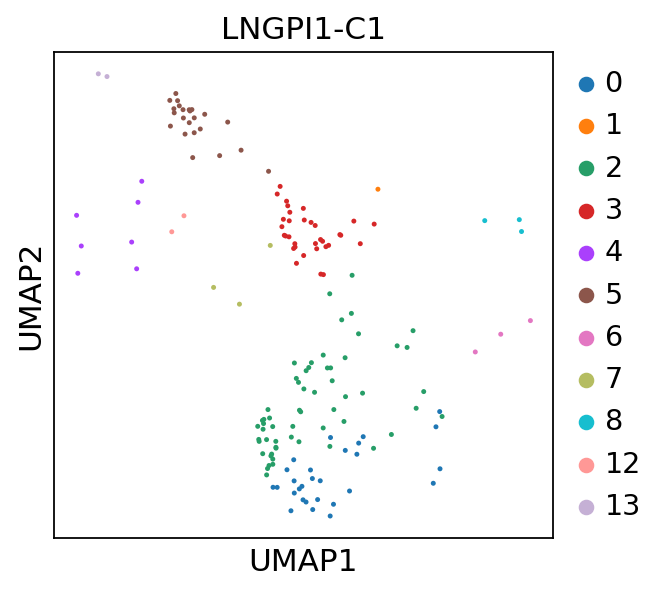

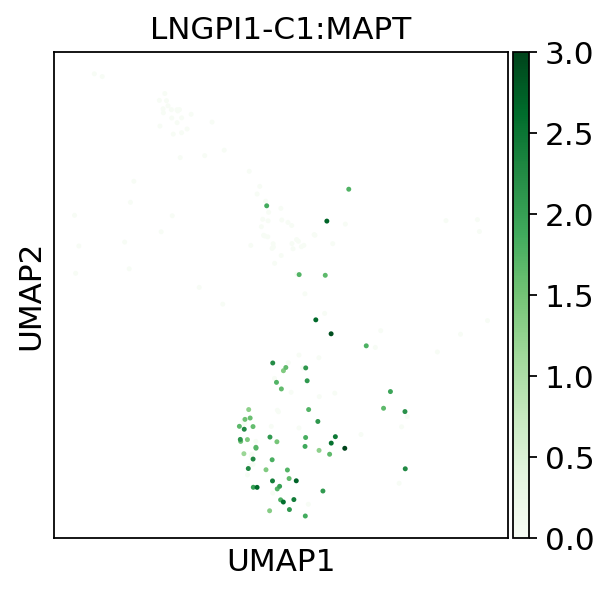

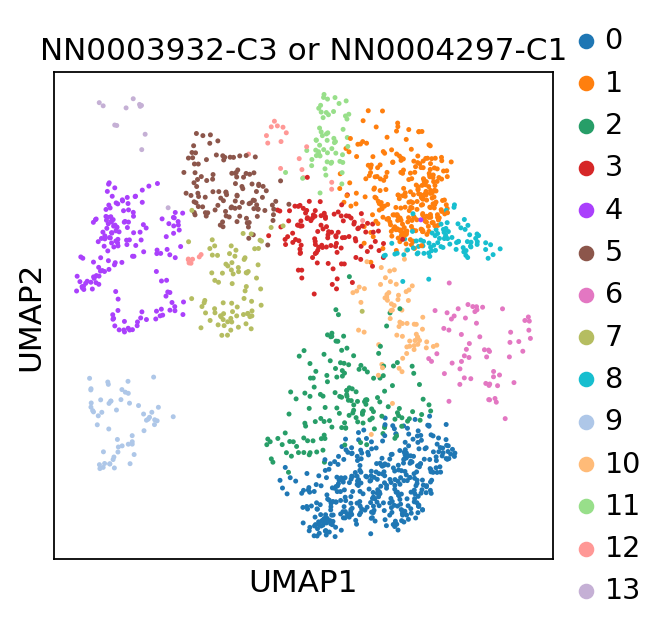

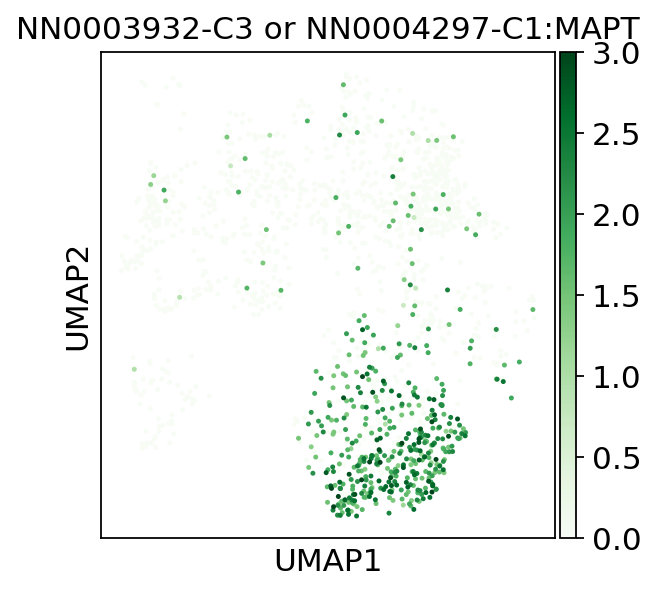

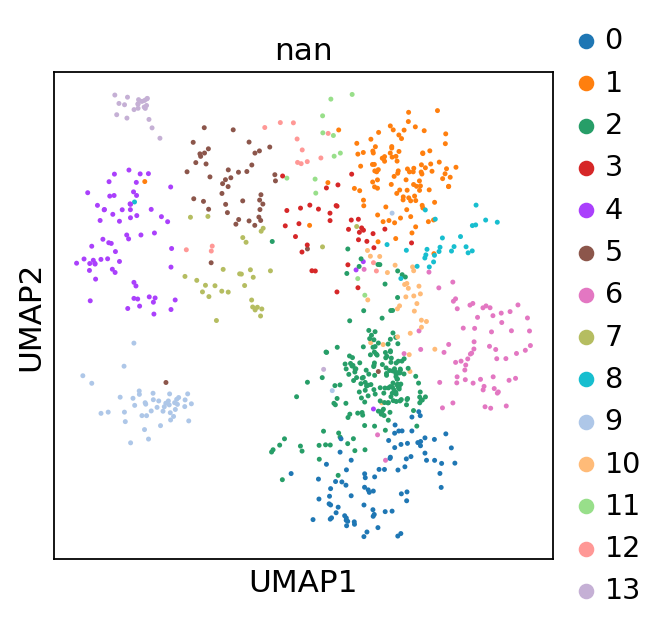

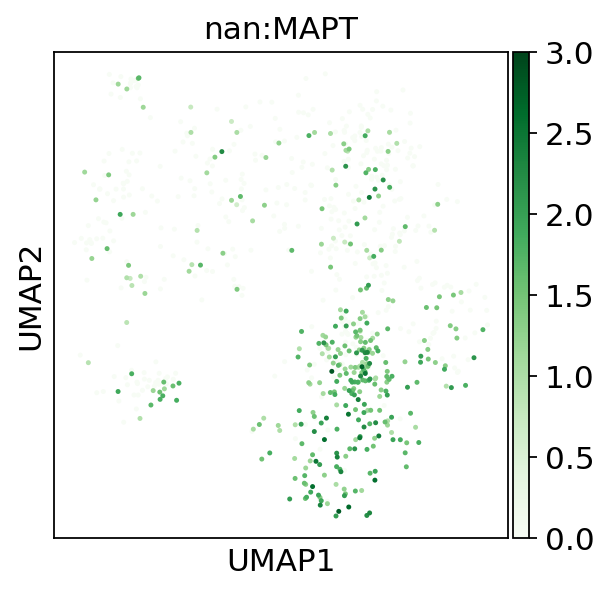

In [0]:
for i in labels:
  ax_title=i+":MAPT"
  ax = sc.pl.umap(adata[adata.obs["donor_label"] == i], color="leiden", color_map="Blues", title=i, size=20)
  sc.pl.umap(
    adata[adata.obs["donor_label"] == i],
    size=20,
    color=["MAPT"],
    color_map="Greens",
    vmax=3,
    title=ax_title,
    ax = ax
  )
